<a href="https://colab.research.google.com/github/baharjr/baharjr/blob/main/Copy_of_Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content.drive')

Mounted at /content.drive


In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory
import pathlib, os

In [ ]:
base_dir= pathlib.Path('/content.drive/MyDrive/PAdata')

In [ ]:
traindata= image_dataset_from_directory(
    os.path.join (base_dir, 'traindata'),
    image_size= (180, 180),
    label_mode= ('binary'),
    labels= 'inferred',
    batch_size=32)

Found 184 files belonging to 2 classes.


In [ ]:
testdata= image_dataset_from_directory(
    os.path.join(base_dir, 'testdata'),
    image_size= (180,180),
    label_mode=('binary'),
    labels='inferred',
    batch_size= 32
)

Found 208 files belonging to 2 classes.


In [ ]:
validdata=image_dataset_from_directory(
    os.path.join(base_dir, 'validdata'),
    image_size=(180,180),
    label_mode= 'binary',
    labels= 'inferred',
    batch_size= 32

)

Found 70 files belonging to 2 classes.


In [ ]:
for data_batch, labels_batch in traindata:
  print('batch_shape', data_batch.shape)
  print('labels shape', labels_batch.shape)
  break

batch_shape (32, 180, 180, 3)
labels shape (32, 1)


In [ ]:
from tensorflow import keras
from keras import layers
cnn_base=keras.applications.vgg16.VGG16(
    weights= 'imagenet',
    include_top= False,
    input_shape= (180,180,3))
cnn_base.trainable= False
cnn_base.summary()


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [ ]:
data_augmentation= keras.Sequential(
    [layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.3)]
)

In [ ]:
inputs= keras.Input(shape = (180,180,3))
x= data_augmentation(inputs)
x=keras.applications.vgg16.preprocess_input(x)
x=cnn_base(x)
x= layers.Flatten()(x)
x=layers.Dense(256,activation= 'relu')(x)
x=layers.Dense(1,activation='sigmoid')(x)
model=keras.Model(inputs=inputs, outputs=x)
model.compile(loss='binary_crossentropy',
              optimizer= 'adam',
              metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 tf.__operators__.getitem (S  (None, 180, 180, 3)      0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 180, 180, 3)      0         
                                                                 
 vgg16 (Functional)          (None, 5, 5, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 12800)             0         
                                                             

In [ ]:
callbacks= [
    keras.callbacks.ModelCheckpoint(
        filepath= 'feature_extraction_with_data_augmentation.keras',
        save_best_only= True,
        monitor='val_loss'
    )
]

In [ ]:
history= model.fit(
    traindata,
    epochs=30,
    validation_data=validdata,
    callbacks= callbacks)

Epoch 1/30
6/6 [==============================] - 101s 17s/step - loss: 10.0414 - accuracy: 0.6033 - val_loss: 7.5384 - val_accuracy: 0.5429
Epoch 2/30
6/6 [==============================] - 91s 15s/step - loss: 2.2016 - accuracy: 0.7391 - val_loss: 3.9645 - val_accuracy: 0.5857
Epoch 3/30
6/6 [==============================] - 88s 15s/step - loss: 0.7737 - accuracy: 0.7989 - val_loss: 1.3012 - val_accuracy: 0.6714
Epoch 4/30
6/6 [==============================] - 91s 15s/step - loss: 0.6193 - accuracy: 0.8043 - val_loss: 1.6394 - val_accuracy: 0.5571
Epoch 5/30
6/6 [==============================] - 87s 15s/step - loss: 0.6884 - accuracy: 0.8098 - val_loss: 1.2073 - val_accuracy: 0.6429
Epoch 6/30
6/6 [==============================] - 89s 15s/step - loss: 0.3074 - accuracy: 0.8533 - val_loss: 1.1911 - val_accuracy: 0.6286
Epoch 7/30
6/6 [==============================] - 87s 15s/step - loss: 0.2298 - accuracy: 0.9130 - val_loss: 1.1157 - val_accuracy: 0.6143
Epoch 8/30
6/6 [=========

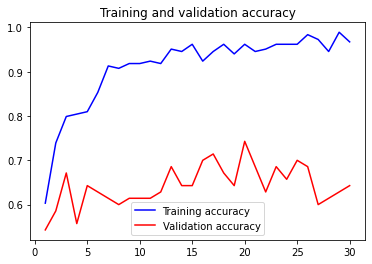

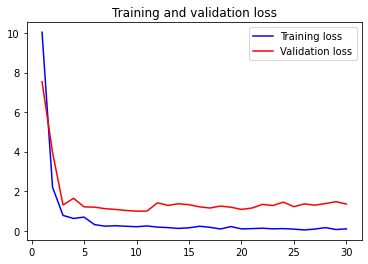

In [ ]:
import matplotlib.pyplot as plt
accuracy= history.history['accuracy']
val_accuracy= history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "b", label="Training accuracy")
plt.plot(epochs, val_accuracy, "r", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "b", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
from google.colab import files
myfile= files.upload()
from google.colab import files
myfile= files.upload()
from google.colab import files
myfile= files.upload()

Saving images-2.jpeg to images-2 (4).jpeg


Saving Unknown-18 to Unknown-18 (1)


Saving images.jpeg to images (4).jpeg


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
img3_path='//content/images-2.jpeg'
img1 = image.load_img(img3_path, target_size=(180, 180))
x = image.img_to_array(img1)
x = np.expand_dims(x, axis=0)
x = keras.applications.vgg16.preprocess_input(x)
pred = model.predict(x)
img3_path='/content/Unknown-18'
img2 = image.load_img(img3_path, target_size=(180, 180))
x = image.img_to_array(img2)
x = np.expand_dims(x, axis=0)
x = keras.applications.vgg16.preprocess_input(x)
pred = model.predict(x)
img3_path='/content/images.jpeg'
img3 = image.load_img(img3_path, target_size=(180, 180))
x = image.img_to_array(img3)
x = np.expand_dims(x, axis=0)
x = keras.applications.vgg16.preprocess_input(x)
pred = model.predict(x)

FileNotFoundError: ignored

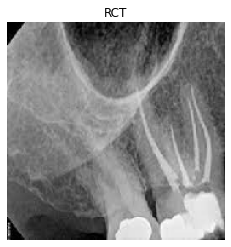

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(img1)
plt.axis("off")
if pred<0.5:
    plt.title('No_RCT')
else:
    plt.title('RCT')



In [ ]:
plt.imshow(img2)
plt.axis("off")
if pred<0.5:
    plt.title('No_RCT')
else:
    plt.title('RCT')


NameError: ignored

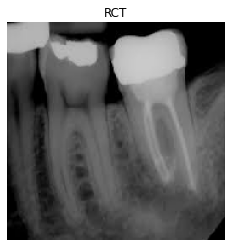

In [ ]:
plt.imshow(img3)
plt.axis("off")
if pred<0.5:
    plt.title('No_RCT')
else:
    plt.title('RCT')


In [ ]:
model.save('RCT classifier')